# Machine Learning: An Overview by Example

# The Problem:

* Loan data for every customer who borrowed £1000 for 12 months

* Examples/cases = row = single customer/loan.
* Features = columns = fields = characteristics of customer/loan.
* Target = the characteristic/column you’re trying to predict/understand
* Problem: what model best describes the relationship of the features to the target?
* Step 1: learn pattern (model) from data which describes features relationship to target
* Step 2: use pattern to guess unknown target from known features 


## How do you do Machine Learning?

* In practice the "learning" step in a project is a very small number of programming lines (often one or two)
* Most time is spent exploring and preparing the data so that the scientist is aware of what analysis may be done
* And to rephrase the data to be compatible with the kind of analysis they wish to perform

### Python
* programming language
* libraries
* batteries included

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn.linear_model as lm
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Domain Understanding

* understand the problem
* concepts and causes <- cannot be determined from data

### Data Understanding

In [2]:
# Read in the loans data and assign it to a dataframe
df = pd.read_csv('data/loan_data.csv')

# View a smaple of the data
df.sample(3)

,ID,Income,Term,Balance,Debt,Score,Default
276,243,19800.0,Short Term,1420.0,1254.0,217.0,False
769,733,60400.0,Long Term,1890.0,0.0,1000.0,False
777,772,54600.0,Short Term,1560.0,2621.0,664.0,False



```
 "ID",         Customer ID
 "Income",     Annual Pre-Tax Income on-application
 "Term" ,      Short or Long Term (6mo or 12mo)
 "Balance",    Current Account Balance on-application
 "Debt" ,      Outstanding Debt on-application
 "Score",      Credit Score (from referencing agency)
 "Default"     Observed Default (True = Default, False = Settle
```

In [3]:
# viewing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       856 non-null    int64  
 1   Income   856 non-null    float64
 2   Term     856 non-null    object 
 3   Balance  856 non-null    float64
 4   Debt     856 non-null    float64
 5   Score    836 non-null    float64
 6   Default  856 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 41.1+ KB


We have 20 null values, we will drop those later

In [4]:
# Dropping unecessary columns, ID is of no use to us
df.drop(columns='ID', inplace = True)

In [5]:
# Summary Statistics of numerical columns
df.describe().round()

,Income,Balance,Debt,Score
count,856.0,856.0,856.0,836.0
mean,29882.0,1214.0,644.0,451.0
std,13976.0,588.0,1150.0,269.0
min,11800.0,140.0,0.0,0.0
25%,19800.0,910.0,0.0,243.0
50%,22900.0,1120.0,65.0,376.0
75%,39025.0,1370.0,959.0,647.0
max,86000.0,6020.0,12891.0,1000.0


In [6]:
# Summary of categorical colums
df['Term'].value_counts()

Short Term    584
Long Term     272
Name: Term, dtype: int64

Mostly short term loans

##### Examining our Target variable

In [7]:
# Counts of the target variable
df.Default.value_counts()

False    768
True      88
Name: Default, dtype: int64

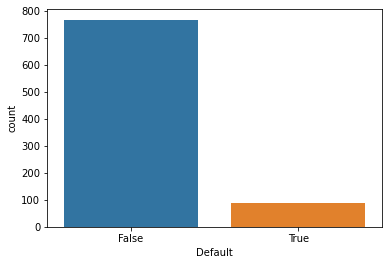

In [8]:
# Visualisation of this
sns.countplot(x='Default', data = df);

We have heavily imbalanced data, this is an issue.<br>
We will continue with a vanilla model to see its perfromance and will investigate methods to help with this

#### Exploratory Data Analysis

It is important to get a good "feel" for the data.

By visualising the target class distribution across each feature, we can guage whether any may be helpful (i.e. predictive) to our model.

If the distribution of the target classes is uniform for a feature, it may not be predictive of our outcome, or add much information to our model.

If we see variation in the distribution of the classes of the target variable across the feature, we may get some helpful information by including it.

#### Investigating Debt

<AxesSubplot:xlabel='Default', ylabel='Debt'>

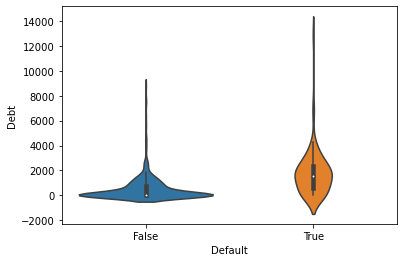

In [9]:
# Violin Plot for debt
sns.violinplot(x="Default", y="Debt", data=df)

What understanding from the above?

<details>
    <summary style="color:green;font-weight:bold">Thoughts</summary>
    
Looks like people who had less debt defaulted a lot less on thier loans

### Looking at the above, do we have negative Debt values?

In [10]:
df['Debt'].describe()

count      856.000000
mean       643.785047
std       1150.286509
min          0.000000
25%          0.000000
50%         65.000000
75%        958.750000
max      12891.000000
Name: Debt, dtype: float64

It appears not, so why does the violin plot show negative values and exceed our max?

A violin plot plays a similar role as a box and whisker plot. 

It shows the distribution of quantitative data across several levels of one (or more) categorical variables.

In this case debt as the quantitive and defaults as the categorical.

Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. 

This is a smoothing over the distribution.

<AxesSubplot:xlabel='Default', ylabel='Debt'>

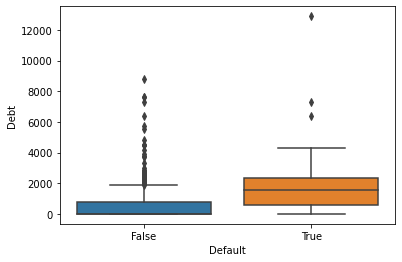

In [11]:
sns.boxplot(x="Default", y="Debt", data=df)

#### Investigating Credit Score

<AxesSubplot:xlabel='Default', ylabel='Score'>

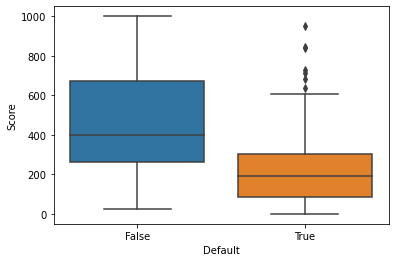

In [12]:
# Box plot of credit score
sns.boxplot(x="Default", y="Score", data=df)

Seems as though people with a higher credit score defaulted less

##### Examing the rest of the variables

<AxesSubplot:xlabel='Term'>

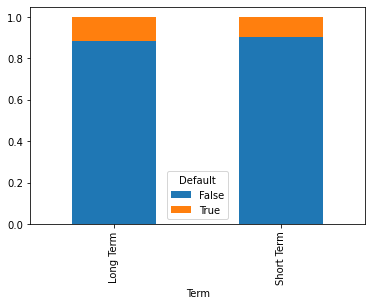

In [13]:
# Stacked Bar chart of loan term and defaults
# These bars do not represent total frequency, but the ratio of defaults in each category
table=pd.crosstab(df.Term,df.Default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Very small proportion of long term loans were defaulted more than on short term. However most of our data is for short term

Histograms for the continous variables

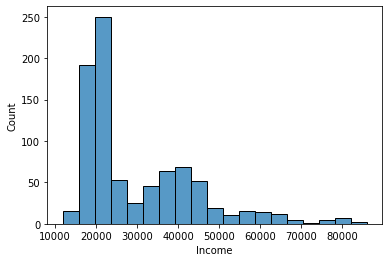

In [14]:
# Standard histogram
sns.histplot(data=df, x="Income");

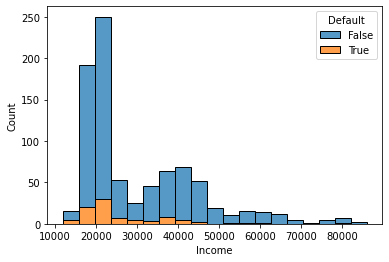

In [15]:
# We can also plot the target variable
# This is plotting two distributions on the same chart
# Notice how y axis has changed
sns.histplot(data=df, x="Income", hue = 'Default', multiple = "stack");

<AxesSubplot:xlabel='Balance', ylabel='Count'>

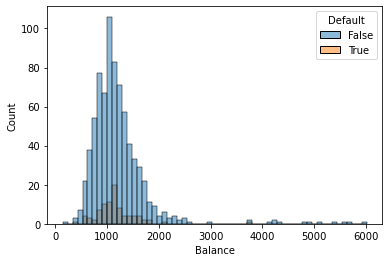

In [16]:
# Balance with defaults
sns.histplot(data=df, x="Balance", hue = 'Default')

<AxesSubplot:xlabel='Balance', ylabel='Count'>

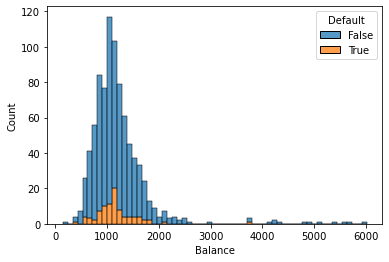

In [17]:
# Rather than overlap we can stack to see total frequency
sns.histplot(data=df, x="Balance", hue = 'Default', multiple = 'stack')

<AxesSubplot:xlabel='Debt', ylabel='Count'>

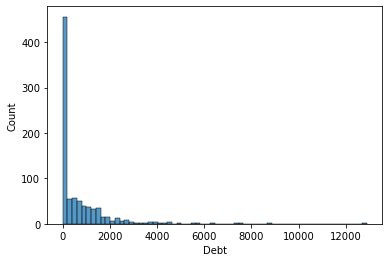

In [18]:
# Debt
sns.histplot(data=df, x="Debt")

<AxesSubplot:xlabel='Debt', ylabel='Count'>

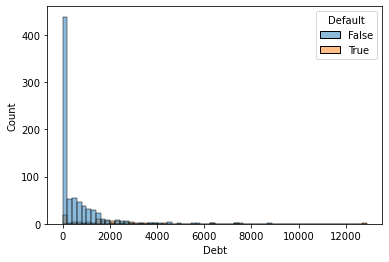

In [19]:
# Debt with Default
sns.histplot(data=df, x="Debt", hue='Default')

<AxesSubplot:xlabel='Score', ylabel='Count'>

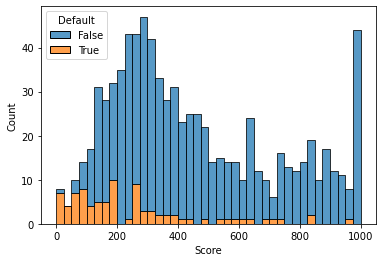

In [20]:
# Score with Default
sns.histplot(data=df, x="Score", hue= 'Default', multiple ='stack', bins = 40)

In [21]:
# Viewing the correlation matrix of all the numeric columns

# Calling the correlation matrix on all numeric columns

corr = df.iloc[:,:-1].corr()

corr.style.background_gradient(cmap='coolwarm')

,Income,Balance,Debt,Score
Income,1.000000,0.625830,0.398331,0.775793
Balance,0.625830,1.000000,0.391145,0.423201
Debt,0.398331,0.391145,1.000000,-0.048554
Score,0.775793,0.423201,-0.048554,1.000000


#### Is the moderately high correlation coefficient between 'score' and 'income' relevant?
What should we consider?

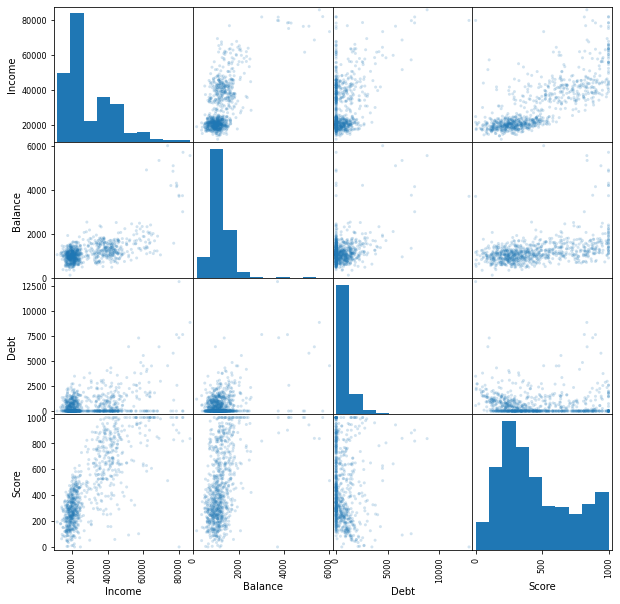

In [22]:
pd.plotting.scatter_matrix(df.iloc[:,:-1], alpha=0.2,figsize =(10,10));

We will progress right now including all features and address the issue of multicolinearty after we have built our first model to use as a compararison.

### Data Preparation
#### Cleaning

In [23]:
# Identify our null values
df.isna().sum()

Income      0
Term        0
Balance     0
Debt        0
Score      20
Default     0
dtype: int64

In [24]:
# Dropping the 20 rows with Nan values
df.dropna(inplace = True)
df.describe().round()

,Income,Balance,Debt,Score
count,836.0,836.0,836.0,836.0
mean,29907.0,1219.0,648.0,451.0
std,14021.0,593.0,1154.0,269.0
min,11800.0,140.0,0.0,0.0
25%,19775.0,910.0,0.0,243.0
50%,22900.0,1120.0,71.0,376.0
75%,39025.0,1380.0,966.0,647.0
max,86000.0,6020.0,12891.0,1000.0


In [25]:
# Examing out target class again after dropping the rows
df.Default.value_counts()

False    750
True      86
Name: Default, dtype: int64

We only lost two from the minorty class, not so bad

# Encoding

We have both a categorical feature and and target variable.

In order to build a Logistic Regression Model, or any Machine Learning model, we need to convert these categories into numbers.


Dealing with the target 'Defaults' is straight forward, this is True or False, so we can simply assign it to be 0 or 1.


To do this we will be using SciKit-Learns Label Encoder.

`.fit` -> Figure out how to do something. e.g. calculate $\mu$ & $\sigma$ for normalising, figure out how to map True/False to a number 1/0 

`.transform` -> apply the function to the data

`.fit_transform` -> Do all at once

In [26]:
# Calling the label encoder
le = preprocessing.LabelEncoder()

# Fitting it to the target columns
le.fit(df['Default'])

# Creating a new column which will hold the old labels for us to inspect
# This column in unecessary and will be dropped
# It is just for us to examine
df['old_labels'] = df['Default']

# Transforming the target column
df['Default'] = le.transform(df.Default)

In [27]:
# We can examine the new column created alongside the old labels
df.sample(10)

,Income,Term,Balance,Debt,Score,Default,old_labels
408,21600.0,Short Term,900.0,147.0,323.0,0,False
607,42900.0,Short Term,1030.0,0.0,988.0,0,False
90,17600.0,Long Term,1010.0,556.0,350.0,0,False
622,39500.0,Short Term,1210.0,778.0,826.0,0,False
122,19200.0,Long Term,1410.0,0.0,134.0,0,False
81,17900.0,Long Term,970.0,845.0,108.0,0,False
172,21700.0,Short Term,1080.0,297.0,473.0,0,False
107,24300.0,Short Term,850.0,0.0,254.0,0,False
346,21900.0,Short Term,750.0,0.0,335.0,0,False
367,17000.0,Short Term,760.0,1105.0,129.0,0,False


We have assigned 0 for False and 1 for True

Question,   any ideas why the assignment happened like this?  Why wasn't it the other way around?

<details>
    <summary style="color:green;font-weight:bold">Answer... kind of</summary>
    
Generally it will assign labels from 0 onwards in the order that it encounters the categories in alphabetical order <br>
F is before T, so it was assigned 0<br>
However as the data type for this column is boolean, it may have used the default values for True and False.


In [28]:
# We can drop the old labels column now
df.drop('old_labels', axis=1, inplace=True);

## Dealing with the categorical 'Term' column
Encoding this variable is a little bit more difficult<br>
There two ways to approach this, either encode as we did before, assigning a 0 or 1 to each class.

In this case it would be a 0 for short term and a 1 for long term.


We are able to use this approach becasue it feels natural that Long term should be "bigger" than short term.

If we were dealing with another categorical variable with no inherent order such as Gender or Colour, that approach should not be taken.

Or we can use One-Hot-Encoding.

In which case the term column would become two columns, one for short term and one for long term.

If a loan was short term, it would have a 1 in the short term column and a 0 in the long term column and vice versa.

I will proceed with One-Hot-Encoding to demonstrate the method, but i will include both types of encoding and we can compare any differences in the model.

# Ordinal encoding

In [29]:
# Importing the required method
from sklearn.preprocessing import OrdinalEncoder

# Calling the encoder and specifying the order to encode
enc = OrdinalEncoder(categories = [['Short Term', 'Long Term']])

# Fitting it to a created column for the data,'Term_ordinal'
df['Term_ordinal'] = enc.fit_transform(df['Term'].values.reshape(-1, 1))



In [30]:
df.head()

,Income,Term,Balance,Debt,Score,Default,Term_ordinal
0,17500.0,Short Term,1460.0,272.0,225.0,0,0.0
1,18500.0,Long Term,890.0,970.0,187.0,0,1.0
2,20700.0,Short Term,880.0,884.0,85.0,0,0.0
4,24300.0,Short Term,1260.0,0.0,495.0,0,0.0
5,22900.0,Long Term,1540.0,1229.0,383.0,0,1.0


### get_dummies() in Pandas to One-Hot-Encode

 - We could call a OneHotEncoder from sci kit learn as we have done with other enocders before.
 - But Pandas also has some methods that we can utilise

nominal data -> OneHotEncode, 
ordinal Data -> OrdinalEnocder, encode on a scale 1,2,3,4 etc.

In [31]:
# Applying the get dummies method on the Term column
df = pd.get_dummies(df, columns=['Term'])

In [32]:
# Re-organisg the columns in the data frame for a nicer display
df = df[['Income',
         'Balance',
         'Debt',
         'Score',
         'Term_Long Term',
         'Term_Short Term',
         'Term_ordinal',
         'Default']]

In [33]:
df.head()

,Income,Balance,Debt,Score,Term_Long Term,Term_Short Term,Term_ordinal,Default
0,17500.0,1460.0,272.0,225.0,0,1,0.0,0
1,18500.0,890.0,970.0,187.0,1,0,1.0,0
2,20700.0,880.0,884.0,85.0,0,1,0.0,0
4,24300.0,1260.0,0.0,495.0,0,1,0.0,0
5,22900.0,1540.0,1229.0,383.0,1,0,1.0,0


### Splitting Data

In [34]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(df[['Income',
                                                        'Balance',
                                                        'Debt',
                                                        'Score',
                                                        'Term_Long Term',
                                                        'Term_Short Term',
                                                        'Term_ordinal']], 
                                                    df['Default'], 
                                                    test_size=0.3, 
                                                    random_state=1)


# Scaling the data

- Scaling is also important with Logistic Regression
- The boundary between the classes is set by distance, therefore having features on the same scale is desirable
- We will apply the standard scaler again to all of the other numerical columns


In [35]:
# Assigning the columns to scale to a variable
cols_to_scale = ['Income','Balance','Debt','Score']

In [36]:
# Viewing before re scaling
X_train.describe()

,Income,Balance,Debt,Score,Term_Long Term,Term_Short Term,Term_ordinal
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,29899.829060,1216.717949,658.533333,443.507692,0.326496,0.673504,0.326496
std,14327.897516,601.623799,1193.769524,267.433170,0.469332,0.469332,0.469332
min,11800.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19800.000000,900.000000,0.000000,240.000000,0.000000,0.000000,0.000000
50%,22800.000000,1120.000000,147.000000,372.000000,0.000000,1.000000,0.000000
75%,38700.000000,1360.000000,975.000000,640.000000,1.000000,1.000000,1.000000
max,86000.000000,5720.000000,12891.000000,1000.000000,1.000000,1.000000,1.000000


In [37]:
# importing the package
from sklearn.preprocessing import StandardScaler

# Calling the method twice, once for the features and once for the target
scaler =  StandardScaler()

# Fitting the scaler on the training features and applying it to both the training and test data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [38]:
# viewing after scaling
X_train.describe().round(3)

,Income,Balance,Debt,Score,Term_Long Term,Term_Short Term,Term_ordinal
count,585.000,585.000,585.000,585.000,585.000,585.000,585.000
mean,0.000,-0.000,0.000,-0.000,0.326,0.674,0.326
std,1.001,1.001,1.001,1.001,0.469,0.469,0.469
min,-1.264,-1.425,-0.552,-1.660,0.000,0.000,0.000
25%,-0.706,-0.527,-0.552,-0.762,0.000,0.000,0.000
50%,-0.496,-0.161,-0.429,-0.268,0.000,1.000,0.000
75%,0.615,0.238,0.265,0.735,1.000,1.000,1.000
max,3.919,7.492,10.256,2.083,1.000,1.000,1.000


### Modelling
* logistic regression = learning a simple boundary in the data 
* classifier 
* "fit" means "learn" 
* once learnt the model may be reused





In [39]:
X_train.columns

Index(['Income', 'Balance', 'Debt', 'Score', 'Term_Long Term',
       'Term_Short Term', 'Term_ordinal'],
      dtype='object')

In [40]:
# Defining which columns we will use as inputs to our model
cols = ['Income', 
        'Balance', 
        'Debt', 
        'Score', 
        'Term_Long Term',
        'Term_Short Term']

In [41]:
lr = lm.LogisticRegression(penalty='none',
                            solver='lbfgs',
                            max_iter=1000
                           )

lr.fit(X_train[cols], y_train)

LogisticRegression(max_iter=1000, penalty='none')

Types of solvers for logistic regression<br>
When choosing be sure to research how they work and if there are assumptions you would need to address

* newton-cg — It's slow for large datasets
* lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. 
it saves memory. It isn't super fast with large data sets. It is the default solver as of Scikit-learn version 0.22.0.
* liblinear — Library for Large Linear Classification.  It is the default solver prior to v0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.
* sag — Stochastic Average Gradient descent.  Fast for big datasets.
* saga — Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

### Make Predictions

In [42]:
# Examining one row from the training data and how it was classified
sample = X_train.iloc[10,:-1]
sample

Income             2.710333
Balance            6.876090
Debt               4.811128
Score              1.480111
Term_Long Term     0.000000
Term_Short Term    1.000000
Name: 793, dtype: float64

In [43]:
sample.values

array([2.71033318, 6.87608986, 4.81112771, 1.48011097, 0.        ,
       1.        ])

In [44]:
# Predicting a class from a single row of data
# The output is the probability of belonging to either class
lr.predict_proba(sample.values.reshape(1,-1))

C:\Users\Thomas Holmes\.conda\envs\ppds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.95830358, 0.04169642]])

The model has predicted that the data point has a 68% chance of belonging to class 0 (settles), and a 32% chance of belonging to class 1 (defaults).

In [45]:
# We can call for it to predict a class
# This will be the class with the largest probabilty of that data point belonging to it
prediction = lr.predict(sample.values.reshape(1,-1))
print(prediction)

[0]


C:\Users\Thomas Holmes\.conda\envs\ppds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
# Let's compare all our predictions against all of the target variables
from sklearn import metrics 

y_pred = lr.predict(X_test[cols])
 

print(f"Accuracy of the model: {metrics.accuracy_score(y_test, y_pred) * 100:.4f}%")

Accuracy of the model: 90.0398%


## $Accuracy = 100 \times\frac{\#~~corrrect~~guesses}{\#~~of~~guesses} = 100 \times\frac{TP + TN}{TP + FP + TN + FN}$

In [47]:
(df[df["Default"]==0].shape[0] / df.shape[0]) * 100

89.71291866028707

Decide that one outcome (e.g. Defaulting) is the "positive oucome", the other is the "negative".

* True == correct guess
* False == incorrect guess

True positive == We corectly guessed the positive outcome

* True Positive  (TP)
* False Positive (FP)
* True Negative  (TN)
* False Negative (FN)

An accuracy of 90%, surely that is amazing?

However, judging a model by its accuracy alone, especially when you have a target class imbalance, can lead to misconceptions about the power of the model.

Think about it. If 90% of the data fell into one target class, and the model decided to simply predicted that class in all cases, it would be around 90% accurate.

I think we can agree that that model isn't a good one, yet it appears to us as if it is.

We must therefore investiagte model performance further, using a wider set of statistics.

### Confusion Matrix
![alt text](images/cmtpfp.png "Confusion Matrix")

### Accuracy

- It is simply the ratio of correctly predicted observations.
- Using accuracy is only good for symmetric data sets where the class distribution is 50/50 and the cost of false positives and false negatives are roughly the same.
- Example: you are building a model which predicts whether a device is defective: 
- The class distribution is such that 6 in 1000 devices is truly defective (positive). 
- A model which simply returns “negative” – i.e. not defective – all the time gets it right 99.4% of the time and therefore has an accuracy of 0.994, when in fact it never correctly identifies a defective device!

### Precision
- Precision looks at the ratio of correct positive observations.
- The formula is True Positives / (True Positives + False Positives).
- $Precision = \frac{TP}{TP + FP}$
- Of all the times you predicted the positive outcome, what percentage of the time were you corrrect
- Note that the denominator is the count of all positive predictions, including positive observations of events which were in fact negative.
- Example: you are building a model which predicts whether a device is defective. let's assume our model predicts 8 out of 1000 devices being faulty. If only 5 of those 8 are truly defective the precision is 5/8 = 0.625.

### Recall

- Recall is also known as sensitivity or true positive rate. It’s the ratio of correctly predicted positive events.
- Recall is calculated as True Positives / (True Positives + False Negatives).
- $Recall = \frac{TP}{TP + FN}$
- Of all the times you **should have** guessed the positive outcome, what percentage of the time did you
- Note that the denominator is the count of all positive events, regardless whether they were correctly predicted by the model.
- Using the same example as before, we already knew that 6 out of 1000 devices are truly defective. The model correctly predicted 5 of them. (It also predicted 3 incorrectly, but for the recall measure that’s not important). The recall therefore is 5/6 = 0.833.

### Comparing Precision and Recall

![alt text](images/precision_recall.png "Putting it all together")

### F1-score

- The F1 Score is the weighted average of Precision and Recall. 
- Therefore, this score takes both false positives and false negatives into account. 
- Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 
- It works best if false positives and false negatives have similar cost. 
- If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
- The formula for F1 Score is 2*(Recall * Precision)/(Recall + Precision)

### Putting it all together

![alt text](images/performance.png "Putting it all together")

In [48]:
from sklearn.metrics import classification_report

default_guess_unseen = lr.predict(X_test[cols])
default_known_unseen = y_test


print(classification_report(default_known_unseen, 
                            default_guess_unseen,
                            target_names=["Settles", "Defaults"]))


              precision    recall  f1-score   support

     Settles       0.90      1.00      0.95       219
    Defaults       0.89      0.25      0.39        32

    accuracy                           0.90       251
   macro avg       0.89      0.62      0.67       251
weighted avg       0.90      0.90      0.87       251



* precision: of everything we labelled correctly, what % are defaults
* recall: of everything labelled "default", what % are defaults

### Confusion Matrix

![alt text](images/cm01.png "Confusion Matrix")

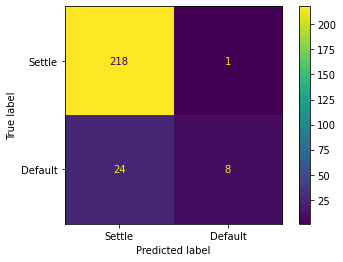

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = lr.predict(X_test[cols])

cm = confusion_matrix(y_test, 
                      predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default'))

disp.plot();



Conclusions on the models performance?

In [ ]:
Conclusions on the models performance

<details>
    <summary style="color:green;font-weight:bold">Summary</summary>
    
The precision for both classes in good. But this maskes the fact that although precision for the majority class is 90%, it is still misclassifying 75% of the defaults as settles.
    
In practice, this model would have some benefit at identifying some loans that have a high chance of being defaluted on, but it is still the minorty of such cases.
    
The main issue that we are dealing with is the fact the classes are so imbalanced.
    


In [ ]:
preds = np.where(lr.predict_proba(X_test[cols])[:,1] > 0.8, 1, 0)
preds

# Feature Selection

It is important that we choose the best combination of features for our model.
This part of the Machine Learning Process is crucial to developing the best possible models.
Also, if we can create a simpler model, with less features but a comparable accuracy, this may be the best option to move forward with also.

We will experiment with the features and observe the changes that result from our choices.

As we saw before we did have some issues with multicolinearity

In [50]:
corr = df[['Income', 'Balance', 'Debt', 'Score']].corr()

corr.style.background_gradient(cmap='coolwarm')

,Income,Balance,Debt,Score
Income,1.000000,0.628587,0.396679,0.775793
Balance,0.628587,1.000000,0.391799,0.423201
Debt,0.396679,0.391799,1.000000,-0.048554
Score,0.775793,0.423201,-0.048554,1.000000


Income is reasonably correleated with Score and Balance.

This would lead us to believe that Score and Balance capture enough of the variance in Income to make it's inclusion redundant. In fact, including it will artificially inflate the importance of income information.

Let's try the model without Income and see how it performs.

              precision    recall  f1-score   support

     Settles       0.90      1.00      0.94       219
    Defaults       0.88      0.22      0.35        32

    accuracy                           0.90       251
   macro avg       0.89      0.61      0.65       251
weighted avg       0.89      0.90      0.87       251



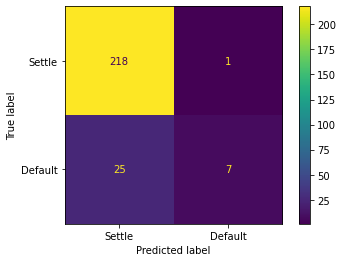

In [51]:
cols = [#'Income', 
        # 'Term_ordinal',
        'Balance',
        'Debt', 
        'Score', 
        'Term_Long Term',
        'Term_Short Term']

lr2 = lm.LogisticRegression(penalty='none',
                            solver='lbfgs',
                            max_iter=1000
                           )

lr2.fit(X_train[cols], y_train)

default_guess_unseen = lr2.predict(X_test[cols])
default_known_unseen = y_test


print(classification_report(default_known_unseen, 
                            default_guess_unseen,
                            target_names=["Settles", "Defaults"]))

predictions = lr2.predict(X_test[cols])

cm = confusion_matrix(y_test, 
                      predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default'))

disp.plot();





We can see a very marginal difference in the model.<br>
Try different sensible combinations of features and see the results.

In the next section looking at Random Forests we will revist feature selection and utilise further methods to help with this process

# Task

 - Try different combinations of features and see how they affect the model

 - Try encoding the Term column ordinally and see if that makes any difference

<details>
    <summary style="color:green;font-weight:bold">Trying the model with Term_ordinal</summary>


    cols = ['Income', 
            'Term_ordinal',
            'Balance',
            'Debt', 
            'Score'
    #         'Term_Long Term',
    #         'Term_Short Term'
           ]

    lr2 = lm.LogisticRegression(penalty='none',
                                solver='lbfgs',
                                max_iter=1000
                               )

    lr2.fit(X_train[cols], y_train)

    default_guess_unseen = lr2.predict(X_test[cols])
    default_known_unseen = y_test


    print(classification_report(default_known_unseen, 
                                default_guess_unseen,
                                target_names=["Settles", "Defaults"]))

    predictions = lr2.predict(X_test[cols])

    cm = confusion_matrix(y_test, 
                          predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=('Settle','Default'))

    disp.plot();





<details>
    <summary style="color:green;font-weight:bold">Final thoughts</summary>
    
It appears there is little we can do to move the model much further with the feature selection and engineering that we are applying<br>
    
Some other techniques will be needed to improve this model further.<br>
    
The main issue that is holding us back is the fact that the classes are so imbalanced, Standard Logistic Regression does not deal with this very well.<br>
    
The options we have are:<br>
    
1) Somehow balance the classes, but we cant obtain more data to do so<br>
or<br>
2) Build a model that is better at handling imbalanced classes<br>
    
    
In the next few modules we will investigate both options<br>
    
We will cover feature engineering to balance the classes<br>
    and<br>
Apply other types of models such as Random Forests and specifically adapted form of Logistic Regression
    

In [ ]:
default_known_unseen.values.shape

In [ ]:
default_guess_unseen

In [53]:
clf = lm.LogisticRegression(penalty='none',
                            solver='lbfgs',
                            max_iter=1000
                           )

In [54]:
from sklearn.metrics import auc, roc_curve

clf.fit(X_train,y_train)

default_guess_unseen = clf.predict_proba(X_test)
default_known_unseen = y_test

fpr, tpr, thresholds = metrics.roc_curve(default_known_unseen,
                                         default_guess_unseen[:, 1],
                                         pos_label=1
                                        )
metrics.auc(fpr, tpr)


0.8520262557077626

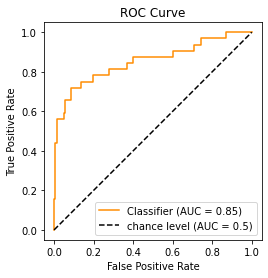

In [55]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    default_known_unseen, 
    default_guess_unseen[:, 1],
    color="darkorange"
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


We can see that by applying a more suitable model to the imbalanced Data we have acheived much better results than with the standard Model with equal weights

In [ ]:
from imblearn.over_sampling import SMOTE

SMOTE()

### Reciever Operating Characteristic (ROC) -> Area Under the Curve (AUC)

Made up of two things:
* TPR == Recall = TP/(TP + FN)
* FPR = FP/(TN + FP)

* Ideally we maximise the TPR, and minimise the FPR

Commonly, the TPR & FPR are plotted against each other while the positive predisction threshold is altered. i.e. P(Default) is changed from 0 to 1 

* ROC curve is that graph:
    * Good if goes up faster than along
    * Bad if follows diagonal
    
* AUC is a metric to summarise the graph:
    * Area under the ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

y_score = clf.fit(X_train, y_train).decision_function(X_test)
n_classes = 0
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
roc_auc